In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

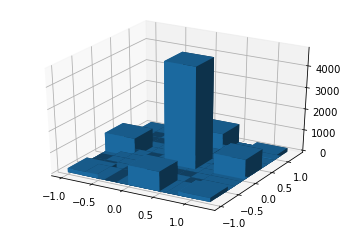

In [27]:
N = 100000
MEAN = 0.0
VAR = 1.0
RANGE = 1
BINS = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sumpled = (np.random.normal(MEAN, VAR, (10000, 2))).astype(np.int)
hist, xedges, yedges = np.histogram2d(sumpled[:, 0], sumpled[:, 1], bins=BINS, range=[[-RANGE, RANGE], [-RANGE, RANGE]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

# plt.hist(sumpled, 50, density=True)
fig.savefig("normal_sumpled.png")

In [28]:
lin = np.linspace(-RANGE, RANGE, BINS)

X = 0
p = 0
x_sumpled = sumpled[sumpled[:, 0] == X]
for ind in range(-RANGE, RANGE + 1):
     p += sum(x_sumpled[:, 1] == ind) / N   

print(f"X: {X} の周りでの周辺化 => probability: {p}")

X: 0 の周りでの周辺化 => probability: 0.06558


In [31]:
X = 0
Y = 0
p = 0
x_sumpled = sumpled[sumpled[:, 0] == X]
y_sumpled = sumpled[sumpled[:, 1] == Y]
x_y_sumpled = y_sumpled[y_sumpled[:, 0] == X]

print(f"乗法定理によるp(x): X: {X}, Y: {Y} => {(len(y_sumpled) / N) * (len(x_y_sumpled) / len(y_sumpled))}")

乗法定理によるp(x): X: 0, Y: 0 => 0.047369999999999995


In [3]:
csv = pd.read_csv("csv/dere_profil .csv", header=0)

In [7]:
df = pd.DataFrame(columns=csv.columns)
for index, row in csv.iterrows():
    try:
        to_int_labels = ["B", "W", "H", "height", "weight", "age"]
        for label in to_int_labels:
            tmp = row[label].strip("cm")
            tmp = tmp.strip("kg")
            row[label] = int(tmp)
    except:
        print(f"Error: {row}")
        continue
    
    df = df.append(row)
        


Error: l_name               安部
f_name               菜々
l_name_y             あべ
f_name_y             なな
l_name_e            abe
l_name_e.1         nana
type                 Cu
age              永遠の17歳
height              146
weight               40
B                    84
W                    57
H                    84
birthday          5月15日
sign                牡牛座
blood                O型
dominant              右
hometown          ｳｻﾐﾝ星
hobby         ｳｻﾐﾝ星との交信
CV                三宅麻理恵
Name: 11, dtype: object
Error: l_name                           大沼
f_name                          くるみ
l_name_y                       おおぬま
f_name_y                        くるみ
l_name_e                     ohnuma
l_name_e.1                   kurumi
type                             Cu
age                              13
height                        145cm
weight                         40kg
B                              おっきい
W                               ふつう
H                              まぁまぁ
birthday      

In [12]:
height = csv["height"].values

mean = np.mean(height)


TypeError: unsupported operand type(s) for +: 'int' and 'str'